The Centre for Research on the Epidemiology of Disasters' Data set about the American Typhoons (2000-2022)
  

In [37]:
import pandas as pd #Importing the matplotlib library and renaming it as plt.

import matplotlib.pyplot as plt #Importing pandas library

# casualties of storms in America based in EMDAT datasets
data = pd.read_excel(r'2000-2022-emdat_public_2022_04_24_query_uid-XuKaJG.xlsx', sheet_name="emdat data")

df = pd.DataFrame(data) #convert dataset excel into dataframe

 #*************************NEW DATAFRAME***************************************
    
#selecting all needed and specific columns from original dataframe/dataset and creating new dataframe named new_df
new_df = df.iloc[:,[0,1,6,7,9,10, 12,34, 35, 36, 37,38, 40, 41, 42, 43, 44, 22]].copy()



In [38]:
new_df.info() # info() function was used to get an understanding of which aspects of the dataset need cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     386 non-null    object 
 1   Year                                       386 non-null    int64  
 2   Disaster Type                              386 non-null    object 
 3   Disaster Subtype                           386 non-null    object 
 4   Event Name                                 386 non-null    object 
 5   Country                                    386 non-null    object 
 6   Region                                     386 non-null    object 
 7   Total Deaths                               279 non-null    float64
 8   No Injured                                 52 non-null     float64
 9   No Affected                                255 non-null    float64
 10  No Homeless               

In [42]:
new_df.isnull().sum() #checking for total null values


Dis No                                         0
Year                                           0
Disaster Type                                  0
Disaster Subtype                               0
Event Name                                     0
Country                                        0
Region                                         0
Total Deaths                                 107
No Injured                                   334
No Affected                                  131
No Homeless                                  342
Total Affected                               110
Reconstruction Costs, Adjusted ('000 US$)    384
Insured Damages ('000 US$)                   309
Insured Damages, Adjusted ('000 US$)         309
Total Damages ('000 US$)                     174
Total Damages, Adjusted ('000 US$)           174
Dis Mag Value                                259
dtype: int64

In [54]:
# From the results above, there are a number of null values that need to be cleaned. And pandas can only clean the dataframe if all rows has values specially for integers. All object data types are already have no null values, which they are all strings. Thus, fillna() function was used to replace null values to zero for smooth data analysis.
new_df = new_df.fillna(0) # replace NaN with zero value

In [58]:
                   
#After changing the null values in every in valued columns on the dataframe, astype() function was used to change data types of specific columns with dictionary indexing.
convert_datatypes = {"Total Deaths":int,
                     "No Injured":int,
                     "No Affected":int,
                     "No Homeless":int,
                     "Total Affected":int,
                     "Reconstruction Costs, Adjusted ('000 US$)": int,
                     "Insured Damages ('000 US$)": int,
                     "Insured Damages, Adjusted ('000 US$)": int,
                     "Total Damages ('000 US$)":int,
                     "Total Damages, Adjusted ('000 US$)": int}
new_df= new_df.astype(convert_datatypes) #converting columns datatypes

new_df.isnull().sum() #checking for total null values


#After all of these data cleaning processes, the final dataframe for analysis were create and aas named "new_df". And from the results below of isnull() function from the new dataframe, there are now no null values from within data frame. Thus, data analysis would be smooth and no errors can occur on the latter part of this EDA.


Dis No                                       0
Year                                         0
Disaster Type                                0
Disaster Subtype                             0
Event Name                                   0
Country                                      0
Region                                       0
Total Deaths                                 0
No Injured                                   0
No Affected                                  0
No Homeless                                  0
Total Affected                               0
Reconstruction Costs, Adjusted ('000 US$)    0
Insured Damages ('000 US$)                   0
Insured Damages, Adjusted ('000 US$)         0
Total Damages ('000 US$)                     0
Total Damages, Adjusted ('000 US$)           0
Dis Mag Value                                0
dtype: int64

A. Determine the top 5 typhoons from 2000-2022 that brought the greatest number of casualties to the in America as a whole based from the Total Affected and Total Damages, Adjusted ('000 US$) x variables. 

,Total Affected
Event Name,
Hurricane 'Irma',10138842
Hurricane 'Eta',7152272
Hurricane Michelle,5900012
Frances,5008450
"Hurricane ""Gustav""",2633282
,"Total Damages, Adjusted ('000 US$)"
Event Name,
Katrina,173439092
Hurricane Harvey,105018585


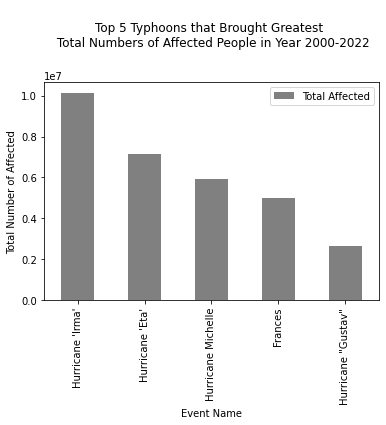

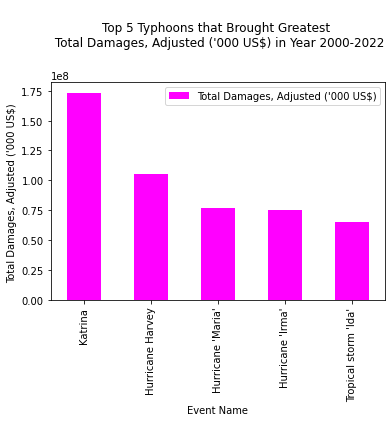

In [52]:
from IPython.display import display_html 

# Total Number of Affected Individuals
TopTyphoonAffected = new_df.groupby('Event Name')
TotalAff = TopTyphoonAffected['Total Affected'].sum()
data_TotalAff = pd.DataFrame(TotalAff)
TotalAff_SortedData = data_TotalAff.sort_values(by='Total Affected',ascending=False)
TotalAff_result = TotalAff_SortedData.head(5)


# Total Damages, Adjusted ('000 US$)
TopTyphoonDamage = new_df.groupby('Event Name')
TotalDam = TopTyphoonDamage["Total Damages, Adjusted ('000 US$)"].sum()
data_TotalDam = pd.DataFrame(TotalDam)
TotalDam_SortedData = data_TotalDam.sort_values(by="Total Damages, Adjusted ('000 US$)",ascending=False)
TotalDam_result = TotalDam_SortedData.head(5)


# For displaying of Tables Side by side
space = "\xa0" * 30
TotalAff_result_styler = TotalAff_result.style.set_table_attributes("style='display:inline'").set_caption('\n Top 5 Typhoons that Brought Greatest \n Total Numbers of Affected People in Year 2000-2022')
TotalDam_result_styler = TotalDam_result.style.set_table_attributes("style='display:inline'").set_caption("\n Top 5 Typhoons that Brought Greatest \n Total Damages, Adjusted ('000 US$) in Year 2000-2022")

display_html(TotalAff_result_styler._repr_html_()+ space  + TotalDam_result_styler._repr_html_(), raw=True)



#********************************

#graphing of data
TotalAff_result.plot(kind="bar",color="gray")
plt.xlabel("Event Name")
plt.ylabel("Total Number of Affected")
plt.title("\nTop 5 Typhoons that Brought Greatest \n Total Numbers of Affected People in Year 2000-2022\n\n")
plt.show()

TotalDam_result.plot(kind="bar",color="magenta")
plt.xlabel("Event Name")
plt.ylabel("Total Damages, Adjusted ('000 US$) ")
plt.title("\nTop 5 Typhoons that Brought Greatest \n Total Damages, Adjusted ('000 US$) in Year 2000-2022\n\n")
plt.show()

B. Determine the typhoon(s) from 2000-2022 that brought the greatest number of casualties to the different countries in America.

   No.2 objective codes and outputs are separated to avoid overcrowding of contents from this iypynb file.

C. Acquire the data about the top 5 countries who had the greatest number of deaths, injured, and affected individuals from the typhoons on the year 2000-2022. 

In [9]:
#Acquiring the top 5 countries with the highest number of total deaths caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryDeath = new_df.groupby('Country')
TotalData = ByCountryDeath['Total Deaths'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total Deaths',ascending=False)
result = SortedData.head(5)
display(result)


,Total Deaths
Country,
Haiti,4343
United States of America (the),2912
Guatemala,1896
Mexico,664
El Salvador,405


In [10]:
#Acquiring the top 5 countries with the highest number of total injured individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryInjured = new_df.groupby('Country')
TotalData = ByCountryDeath['No Injured'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='No Injured',ascending=False)
result = SortedData.head(5)
display(result)


,No Injured
Country,
Haiti,3393
Guatemala,581
Belize,570
Mexico,368
Dominica,150


,Total Affected
Country,
Cuba,20202593
United States of America (the),11279675
Mexico,6176551
Honduras,5380420
Guatemala,3841847


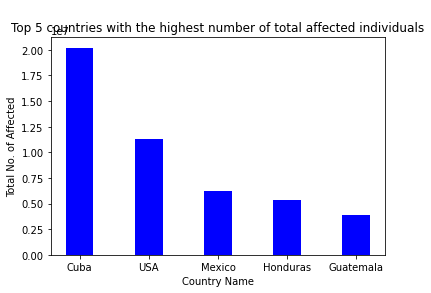

In [11]:
#Acquiring the top 5 countries with the highest number of total affected individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountry = new_df.groupby('Country')
TotalData = ByCountry['Total Affected'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total Affected',ascending=False)
result = SortedData.head(5)
display(result)

#graphing the Country and Total Affected
data = {'Cuba':20202593,'USA':11279675, 'Mexico':6176551, 'Honduras':5380420, 'Guatemala':3841847}
Country_name = list(data.keys())
Affected_values = list(data.values())

plt.bar(Country_name, Affected_values, color ='blue',
        width = 0.4)
 
plt.xlabel("Country Name")
plt.ylabel("Total No. of Affected")
plt.title("\nTop 5 countries with the highest number of total affected individuals")
plt.show()

D. Acquire the data about the name of countries who had the least number of deaths, injured, and affected individuals from the typhoons on 2000-2022.

In [6]:
#Acquiring the top 11 countries with the lowest number of total deaths caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryDeath = new_df.groupby('Country')
TotalData = ByCountryDeath['Total Deaths'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total Deaths',ascending=True)
result = SortedData.head(11)
display(result)


,Total Deaths
Country,
Saint Kitts and Nevis,0
Antigua and Barbuda,1
Trinidad and Tobago,1
Barbados,2
Cayman Islands (the),2
Martinique,2
Canada,3
Anguilla,4
Turks and Caicos Islands (the),4


In [17]:
#Acquiring the top 19 countries with the lowest number of total injured individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryInjured = new_df.groupby('Country')
TotalData = ByCountryDeath['No Injured'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='No Injured',ascending=True)
result = SortedData.head(20)
display(result)


,No Injured
Country,
Anguilla,0
Turks and Caicos Islands (the),0
Trinidad and Tobago,0
Saint Lucia,0
Saint Kitts and Nevis,0
Saint Barthélemy,0
Puerto Rico,0
Panama,0
Nicaragua,0


In [8]:
#Acquiring the top 5 countries with the lowest number of total affected individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountry = new_df.groupby('Country')
TotalData = ByCountry['Total Affected'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total Affected',ascending=True)
result = SortedData.head(5)
display(result)


,Total Affected
Country,
Virgin Island (U.S.),0
Bermuda,0
Saint Barthélemy,0
Virgin Island (British),0
Martinique,8


E. Get the information that shows the top 5 countries who were most affected in terms of economy (dollars) by typhoons from the year 2000-2022. 

,"Total Damages, Adjusted ('000 US$)"
Country,
United States of America (the),758704028
Puerto Rico,75979583
Mexico,34988807
Cuba,13638965
Bahamas (the),7117040


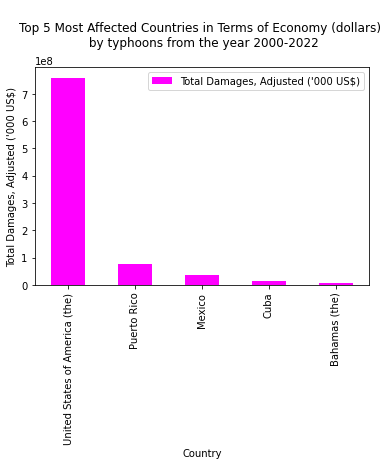

In [9]:
#sorting data for most affected in terms of economy
countrynames = new_df.groupby('Country')
totaldollars = countrynames["Total Damages, Adjusted ('000 US$)"].sum()
td_frame = pd.DataFrame(totaldollars)
SortedData_dollars = td_frame.sort_values(by="Total Damages, Adjusted ('000 US$)",ascending=False)
result_dollars = SortedData_dollars.head(5)
display(result_dollars)

#graphing of data
result_dollars.plot(kind="bar",color="magenta")
plt.xlabel("Country")
plt.ylabel("Total Damages, Adjusted ('000 US$)")
plt.title("\nTop 5 Most Affected Countries in Terms of Economy (dollars) \n by typhoons from the year 2000-2022\n")
plt.show()

F. Determine which top 5 typhoons are the strongest based from the x variable ‘Dis Mag Scale’ or the magnitude of the disaster at its epicenter with the values in kph (kilometer per Hour).

In [11]:


ByTyphoons = new_df.iloc[:,[4, 17]] 
data = pd.DataFrame(ByTyphoons)
SortedData = data.sort_values(by='Dis Mag Value',ascending=False)
result = SortedData.head(5)
display(result)


,Event Name,Dis Mag Value
313,Hurricane 'Irma',300.0
325,Tropical cyclone 'Dorian',298.0
276,Hurricane 'Irma',295.0
273,Hurricane 'Irma',285.0
100,Katrina,280.0
